In [75]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import logging
import anndata

In [76]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import logging
import anndata

from matplotlib import colors
# color_map
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


sc.settings.set_figure_params(dpi=120)

In [77]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import logging
import anndata

from matplotlib import colors
# color_map
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


sc.settings.set_figure_params(dpi=120)

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
sc.logging.print_versions()

-----
anndata     0.9.0.dev35+g6473f20
scanpy      1.8.2
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.9.0.dev35+g6473f20
appnope             0.1.0
attr                19.3.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cairo               1.19.1
cffi                1.14.0
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
fontTools           4.28.2
google              NA
h5py                3.7.0
hypergeom_ufunc     NA
idna                2.10
igraph              0.8.2
ipykernel           5.3.3
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.2
jinja2              2.11.2
joblib              0.16.0
jsonschema          3.2.0
kiwisolver          1.2.0
leidenalg           0.8.1
llvmlite            0.37.0
louvain             0.6.1
markupsafe          1.1.1
matplotlib          3.5.0
mpl_toolkits        NA
natsort             7.0.1
nbformat            5.0.7
nbin

In [78]:
sc.set_figure_params(scanpy=True, dpi_save=400,dpi=150)

In [79]:
plt.rcParams['pdf.fonttype'] = 42

In [81]:
# adata_orig = sc.read("/Users/LoboM/Dropbox/sharedUMass_Macrina_Rene/hESC_2021/bulk/scRNA/objects/END_OF_ANALYSIS.h5ad")

/Users/LoboM/miniconda3/envs/sc-tutorial-0720/lib/python3.8/site-packages/anndata/_core/anndata.py:1837: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [82]:
adata = sc.read("/Users/LoboM/Dropbox/sharedUMass_Macrina_Rene/hESC_2021/bulk/scRNA/objects/END_OF_ANALYSIS.h5ad")

In [83]:
sc.pp.filter_genes(adata, min_cells=1)

filtered out 2741 genes that are detected in less than 1 cells


In [84]:
adata

AnnData object with n_obs × n_vars = 3190 × 27105
    obs: 'Source', 'AFE', 'DE', 'ESC', 'PFE', 'Type', 'Experiment', 'n_counts', 'doublet_score', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'Good Cell', 'S_score', 'G2M_score', 'phase', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells'
    uns: 'Experiment_colors', 'Type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [85]:
del adata.raw

In [86]:
adata.X = adata.layers['counts']

# scran normalize 

In [88]:
adata_tmp = adata.copy()

sc.pp.normalize_per_cell(adata_tmp, counts_per_cell_after=1e6)
sc.pp.log1p(adata_tmp)

sc.pp.highly_variable_genes(adata_tmp, n_top_genes=2000)

#pca
sc.pp.pca(adata_tmp, n_comps=30, random_state=0, use_highly_variable=True, svd_solver='arpack')

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=30
    finished (0:00:00)


In [89]:
sc.pp.neighbors(adata_tmp)

sc.tl.umap(adata_tmp)

sc.tl.louvain(adata_tmp, key_added='groups', resolution=0.5)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 5 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)


In [90]:
adata_tmp

AnnData object with n_obs × n_vars = 3190 × 27105
    obs: 'Source', 'AFE', 'DE', 'ESC', 'PFE', 'Type', 'Experiment', 'n_counts', 'doublet_score', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'Good Cell', 'S_score', 'G2M_score', 'phase', 'leiden', 'groups'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells'
    uns: 'Experiment_colors', 'Type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap', 'louvain'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [1]:
# sc.pl.umap(adata_tmp,color='Source')

In [2]:
# sc.pl.umap(adata_tmp,color='groups')

In [93]:
input_groups = adata_tmp.obs['groups']
data_mat = adata.X.T

In [94]:
import rpy2.rinterface_lib.callbacks

from rpy2.robjects import pandas2ri
import anndata2ri

In [95]:
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

In [96]:
%%R

# Load all the R libraries we will be using in the notebook
library(scran)

In [97]:
data_mat = data_mat.toarray()

In [98]:
%%R -i data_mat -i input_groups -o size_factors

size_factors = computeSumFactors(data_mat, clusters=input_groups, min.mean=0.1)

In [99]:
adata.obs['size_factors'] = size_factors

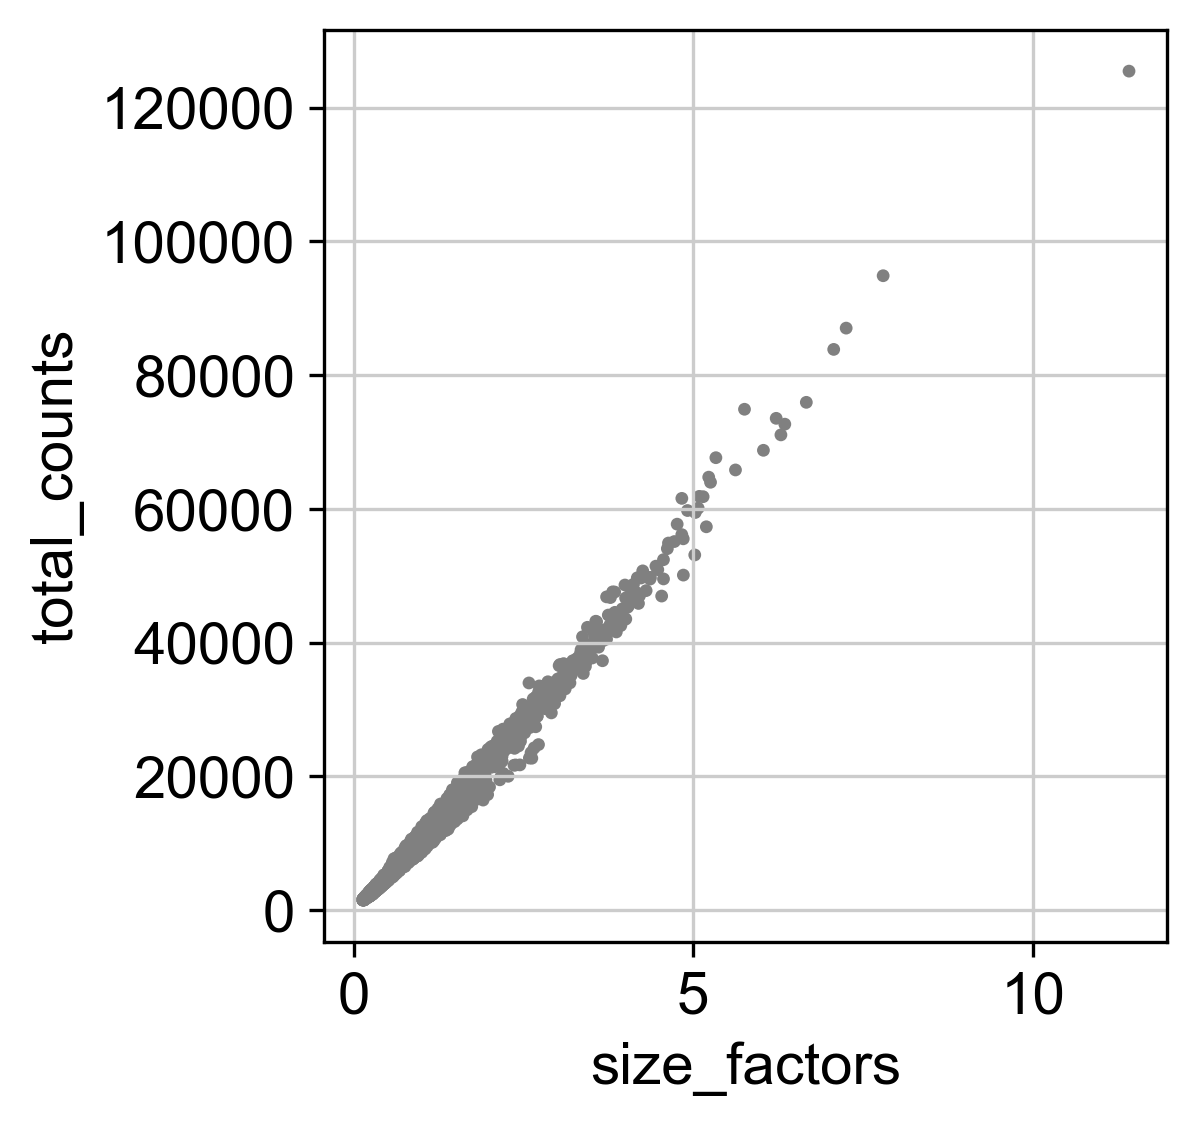

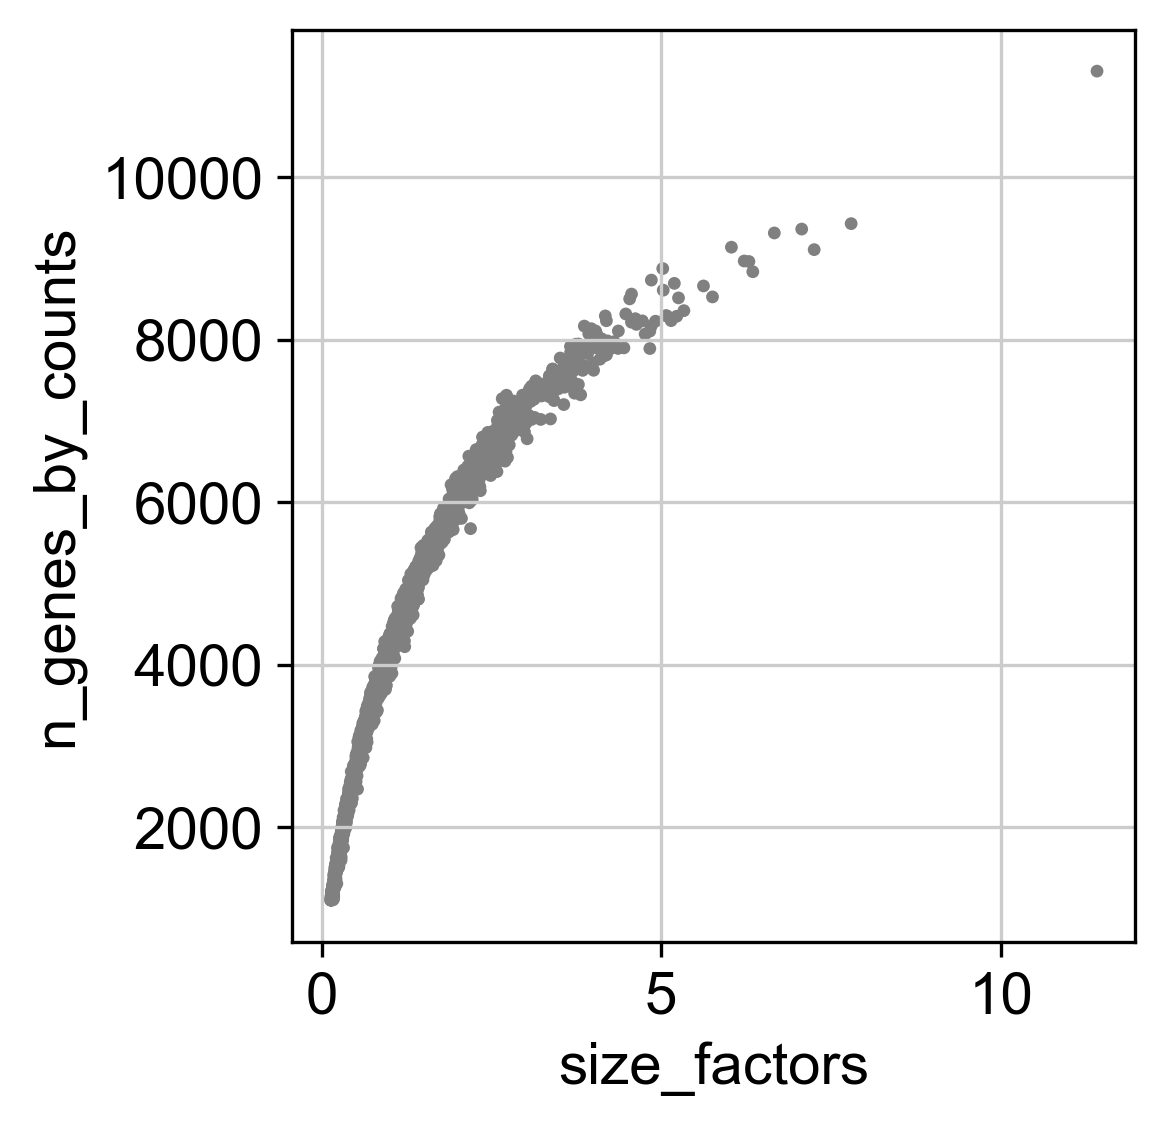

/Users/LoboM/miniconda3/envs/sc-tutorial-0720/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


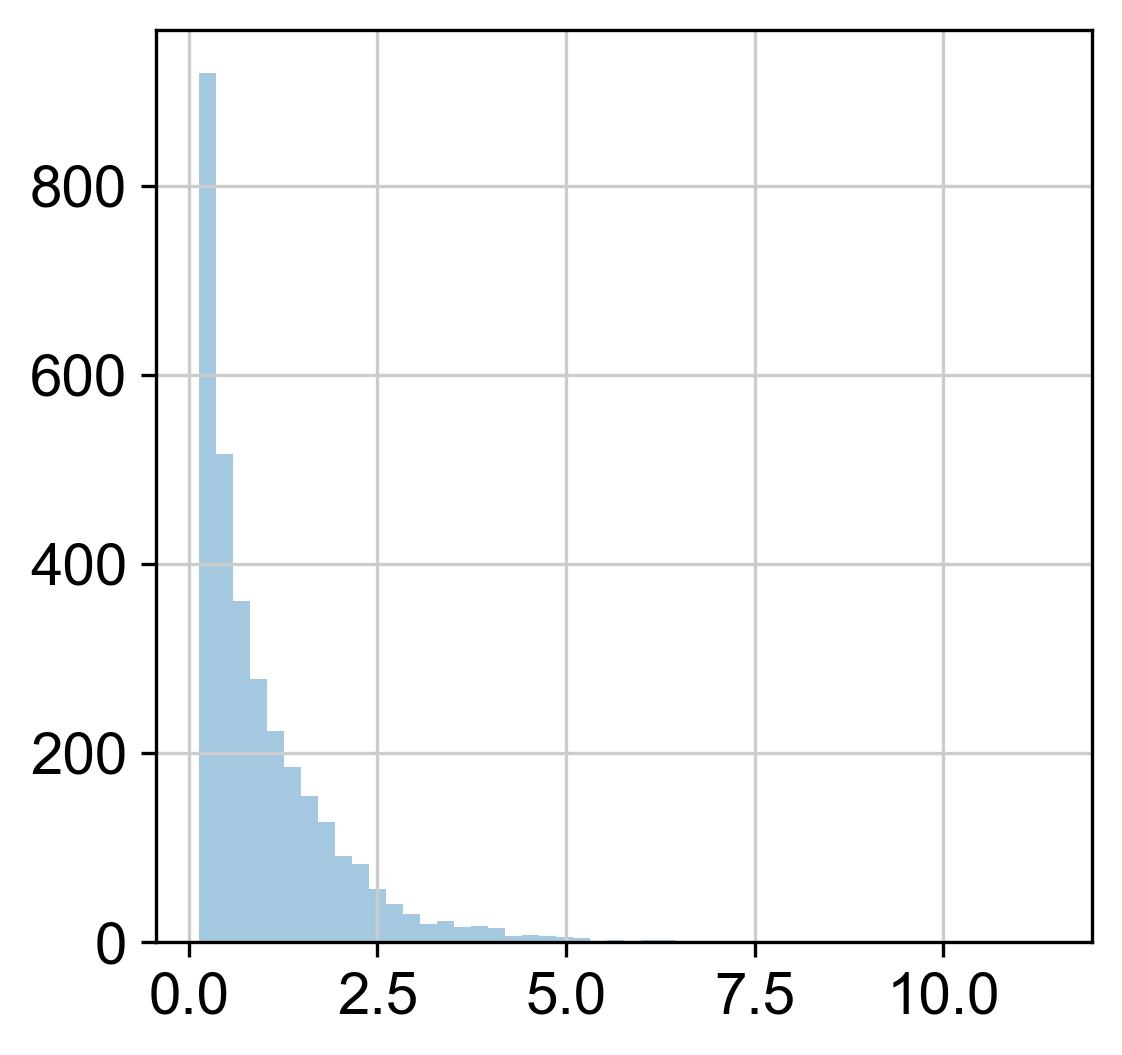

In [100]:
sc.pl.scatter(adata, 'size_factors', 'total_counts')
sc.pl.scatter(adata, 'size_factors', 'n_genes_by_counts')

sns.distplot(size_factors, bins=50, kde=False)
plt.show()

In [102]:
del adata.uns['log1p']

In [103]:
adata.layers["raw_counts"] = adata.X.copy()
adata.X /= adata.obs['size_factors'].values[:,None]
sc.pp.log1p(adata)

In [104]:
adata

AnnData object with n_obs × n_vars = 3190 × 27105
    obs: 'Source', 'AFE', 'DE', 'ESC', 'PFE', 'Type', 'Experiment', 'n_counts', 'doublet_score', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'Good Cell', 'S_score', 'G2M_score', 'phase', 'leiden', 'size_factors'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells'
    uns: 'Experiment_colors', 'Type_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap', 'log1p'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [105]:
# adata.obsm['X_umap'] = adata_orig.obsm['X_umap']

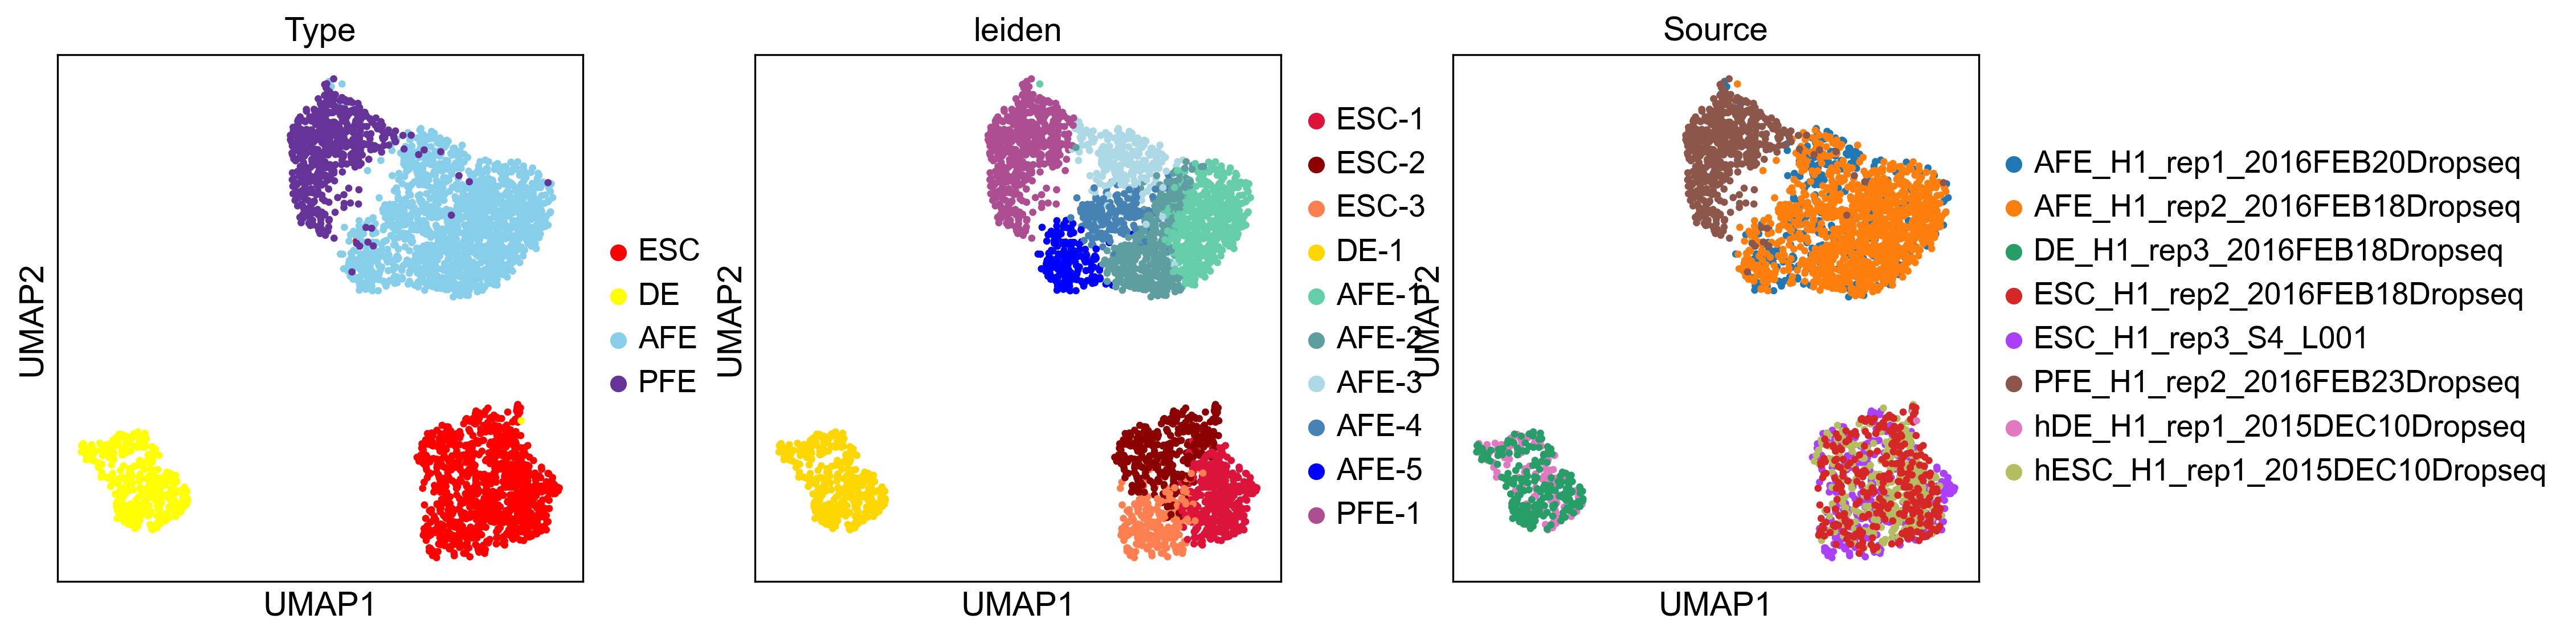

In [106]:
# sc.pl.umap(adata,color=['Type','leiden','Source'])

# send to CellMatch

In [107]:
read_dir_roadmap = "../pipeline_objects/roadmap/"

In [108]:
adata_roadmap = sc.read(read_dir_roadmap + "final_peer_maehr.h5ad")

In [110]:
ortholog_file = "../mart_export_hg38_mm10_orthologs_uniq.txt"
ortholog = pd.read_csv(ortholog_file,sep="\t")

In [111]:
ortholog_1 = ortholog[~ortholog.duplicated("Mouse gene stable ID", keep='first')]
ortholog_2 = ortholog_1[~ortholog_1.duplicated("Gene stable ID", keep='first')]

In [112]:
adata_map = adata_roadmap.raw.to_adata()

In [113]:
mouse_shared = list(set(adata_map.var['gene_ids']).intersection(ortholog_2['Mouse gene stable ID']))

In [114]:
ortholog_3 = ortholog_2[ortholog_2["Mouse gene stable ID"].isin(mouse_shared)] # shared with roadmap and orthologs 

In [115]:
adata.raw

In [116]:
adata_rds = adata.copy()

/Users/LoboM/miniconda3/envs/sc-tutorial-0720/lib/python3.8/site-packages/anndata/_core/anndata.py:1837: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [117]:
del adata_rds.varm
del adata_rds.layers
del adata_rds.obsp

In [118]:
adata_rds.shape

(3190, 27105)

In [119]:
len(list(adata_rds.var.index))

27105

In [120]:
len(set(adata_rds.var.index))

27105

In [122]:
gene_info = pd.read_csv("../objects/mart_export_anno.txt",sep='\t')

In [123]:
gene_info = gene_info[['Gene stable ID','Gene name']]

In [124]:
gene_info = gene_info.drop_duplicates()

In [125]:
len(gene_info['Gene name'])

68324

In [126]:
len(set(gene_info['Gene name']))

40221

In [127]:
gene_info2 = gene_info[gene_info['Gene name'].isin(adata_rds.var.index)]

In [128]:
adata_rds[:,gene_info2['Gene name']]

View of AnnData object with n_obs × n_vars = 3190 × 22529
    obs: 'Source', 'AFE', 'DE', 'ESC', 'PFE', 'Type', 'Experiment', 'n_counts', 'doublet_score', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'Good Cell', 'S_score', 'G2M_score', 'phase', 'leiden', 'size_factors'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells'
    uns: 'Experiment_colors', 'Type_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap', 'log1p', 'Source_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

In [129]:
adata_rds = adata_rds[:,gene_info2['Gene name']].copy()

/Users/LoboM/miniconda3/envs/sc-tutorial-0720/lib/python3.8/site-packages/anndata/_core/anndata.py:1839: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [130]:
len(list(adata_rds.var.index))

22529

In [131]:
len(set(adata_rds.var.index))

20322

In [132]:
ens_id = []
for entry in list(adata_rds.var.index):
    ens_id.append(list(gene_info2[gene_info2['Gene name']==entry]['Gene stable ID'])[0]) # choose 1st one

In [133]:
len(ens_id)

22529

In [134]:
adata_rds.var['gene_id'] = ens_id

In [135]:
len(set(adata_rds.var.index))

20322

In [136]:
adata_rds  # in ensembl IDs 

AnnData object with n_obs × n_vars = 3190 × 22529
    obs: 'Source', 'AFE', 'DE', 'ESC', 'PFE', 'Type', 'Experiment', 'n_counts', 'doublet_score', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'Good Cell', 'S_score', 'G2M_score', 'phase', 'leiden', 'size_factors'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'gene_id'
    uns: 'Experiment_colors', 'Type_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap', 'log1p', 'Source_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

In [137]:
adata_rds = adata_rds[:, adata_rds.var['gene_id'].isin(ortholog_3["Gene stable ID"])]

In [24]:
# adata_rds.var # subset to orthologs

In [139]:
mouse_gene_ids_final = list(ortholog_3[ortholog_3['Gene stable ID'].isin(list(adata_rds.var['gene_id']))]['Mouse gene stable ID'])

In [140]:
len(mouse_gene_ids_final)

14389

In [141]:
adata_map = adata_map[:,adata_map.var['gene_ids'].isin(mouse_gene_ids_final)]

In [142]:
adata_map.shape

(76894, 14389)

In [143]:
len(adata_map.var.index)

14389

In [144]:
len(set(adata_map.var.index))

14389

In [145]:
len(adata_rds.var.index)

14402

In [146]:
len(set(adata_rds.var.index))

14389

In [147]:
adata_rds.obs_names_make_unique()

/Users/LoboM/miniconda3/envs/sc-tutorial-0720/lib/python3.8/site-packages/anndata/_core/anndata.py:1837: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/LoboM/miniconda3/envs/sc-tutorial-0720/lib/python3.8/site-packages/anndata/_core/anndata.py:1839: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [148]:
adata_rds = adata_rds[:, adata_rds.var['gene_id'].isin(ortholog_3["Gene stable ID"])]

In [149]:
adata_rds.var_names_make_unique()

In [150]:
adata_rds = adata_rds[:, adata_rds.var['gene_id'].isin(ortholog_3["Gene stable ID"])]

In [151]:
adata_rds.shape

(3190, 14402)

In [152]:
tmp_check = pd.merge(adata_rds.var,
                        ortholog_3,how='inner',left_on='gene_id',
                        right_on='Gene stable ID').set_index('Mouse gene name')
tmp_check.index.name = None
adata_rds.var = tmp_check

In [158]:
df_rds = adata_rds.to_df()

In [159]:
df_rds = df_rds.loc[:,~df_rds.columns.duplicated()].copy()

In [160]:
df_rds.shape

(3190, 14388)

In [161]:
var_rds = adata_rds.var

In [162]:
var_rds = var_rds.T

In [163]:
var_rds = var_rds.loc[:,~var_rds.columns.duplicated()].copy()

In [164]:
var_rds = var_rds.T

In [166]:
adata_rds = anndata.AnnData(X=df_rds,obs=adata_rds.obs,obsm=adata_rds.obsm,var=var_rds)

In [167]:
adata_rds.shape

(3190, 14388)

In [168]:
new_idx = []

for entry in adata_rds.var.index:
    # print(entry)
    new_idx.append(list(adata_map.var[adata_map.var['gene_ids']==adata_rds.var.loc[entry,'Mouse gene stable ID']].index)[0])

In [170]:
adata_rds.var.index = new_idx

In [3]:
# adata_rds.var.index

In [2]:
# adata_rds

In [1]:
# set(adata_map.var.index) - set(adata_rds.var.index)

In [174]:
adata_map = adata_map[:,adata_rds.var.index]

In [4]:
# adata_map.shape

In [5]:
# adata_rds.var.index

In [6]:
# adata_map.var.index

In [7]:
# adata_map

In [179]:
for entry in ['n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dp_info', 'Timepoint', 'CellType', 'Cluster', 'in_online_obj', 'old_name',
             'orig.ident', 'eday', 'nGene', 'nUMI', 'preliminary_ident', 'Phase', 'included',
              'size_factors', 'samp_all', 'S_score', 'G2M_score', 'phase']:
    del adata_map.obs[entry]

for entry in ['mt','n_cells_by_counts-maehr', 'mean_counts-maehr', 'pct_dropout_by_counts-maehr', 'total_counts-maehr', 'gene.dispersion-maehr', 'gene.dispersion.scaled-maehr', 'gene.mean-maehr', 'feature_types-peer', 'n_cells_by_counts-peer', 'mean_counts-peer', 'pct_dropout_by_counts-peer', 'total_counts-peer', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells']:
    del adata_map.var[entry]
    
del adata_map.uns

del adata_map.obsm

In [8]:
# adata_rds.obs

In [9]:
# adata_rds

In [182]:
for entry in ['AFE', 'DE', 'ESC', 'PFE','n_counts', 'doublet_score', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'Good Cell', 'S_score', 'G2M_score', 'phase','size_factors']:
    del adata_rds.obs[entry]

In [183]:
adata_rds

AnnData object with n_obs × n_vars = 3190 × 14388
    obs: 'Source', 'Type', 'Experiment', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'gene_id', 'Gene stable ID', 'Mouse gene stable ID'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

In [184]:
adata_rds = adata_rds[:,(adata_rds.var['mt']==False) & (adata_rds.var['ribo']==False)]

In [185]:
adata_rds.shape

(3190, 14313)

In [186]:
for entry in ['n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts','means', 'dispersions', 'dispersions_norm', 'n_cells']:
    del adata_rds.var[entry]

In [187]:
del adata_rds.uns

del adata_rds.obsm

In [188]:
adata_map = adata_map[:,adata_rds.var.index]

In [189]:
adata_rds.obs['leiden'].cat.categories

Index(['ESC-1', 'ESC-2', 'ESC-3', 'DE-1', 'AFE-1', 'AFE-2', 'AFE-3', 'AFE-4',
       'AFE-5', 'PFE-1'],
      dtype='object')

In [191]:
adata_rds.rename_categories('leiden',['a:ESC1', 'b:ESC2','c:ESC3', 'd:DE1', 'e:AFE1', 'f:AFE2', 'g:AFE3', 'h:AFE4', 'i:AFE5', 'j:PFE1'])

In [192]:
adata_map.obs['curated_annotation'].cat.categories

Index(['0', '1', '2', '3', '4_ctec', '5', '6_eso_&_oro_1', '7_eso_&_oro_2',
       '8_salivary', '9_thy_progen', '10', '11', '12_ubb', '13', '14', '15',
       '16', '17', '18_eso_&_oro_3', '19_pouch1', '20_eso_&_oro_4', '21',
       '22_thyroid', '23', '24', '25_mtec', '26_parathyroid', '27_respiratory',
       'P:Colon', 'P:DE', 'P:EPI', 'P:Gut tube', 'P:ICM', 'P:Liver', 'P:Lung',
       'P:Pancreas', 'P:Small int', 'P:Thymus', 'P:Thyroid'],
      dtype='object')

In [193]:
# adata.obs['louvain'].cat.reorder_categories(['2', '1', '0'], inplace = True)

In [194]:
adata_roadmap.obs['anno'] = adata_roadmap.obs['curated_annotation'].copy()

In [195]:
adata_roadmap.obs['anno'] = adata_roadmap.obs['anno'].cat.reorder_categories(['P:ICM','P:EPI','P:DE','P:Gut tube','P:Small int','P:Pancreas','P:Colon',
 'P:Liver','P:Lung','P:Thymus','P:Thyroid','13','23','17','1','14','24','21','16','10','3','5','2','0',
                                                                                          '15','11','19_pouch1','27_respiratory','7_eso_&_oro_2','18_eso_&_oro_3','6_eso_&_oro_1','20_eso_&_oro_4','8_salivary','22_thyroid','12_ubb','26_parathyroid','9_thy_progen','4_ctec','25_mtec'])

In [196]:
adata_map.obs['curated_annotation'] = adata_map.obs['curated_annotation'].cat.reorder_categories(['P:ICM','P:EPI','P:DE','P:Gut tube','P:Small int','P:Pancreas','P:Colon',
 'P:Liver','P:Lung','P:Thymus','P:Thyroid','13','23','17','1','14','24','21','16','10','3','5','2','0',
                                                                                          '15','11','19_pouch1','27_respiratory','7_eso_&_oro_2','18_eso_&_oro_3','6_eso_&_oro_1','20_eso_&_oro_4','8_salivary','22_thyroid','12_ubb','26_parathyroid','9_thy_progen','4_ctec','25_mtec'])

<ipython-input-196-c77125728723>:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_map.obs['curated_annotation'] = adata_map.obs['curated_annotation'].cat.reorder_categories(['P:ICM','P:EPI','P:DE','P:Gut tube','P:Small int','P:Pancreas','P:Colon',


In [197]:
adata_map.obs['curated_annotation'].cat.categories

Index(['P:ICM', 'P:EPI', 'P:DE', 'P:Gut tube', 'P:Small int', 'P:Pancreas',
       'P:Colon', 'P:Liver', 'P:Lung', 'P:Thymus', 'P:Thyroid', '13', '23',
       '17', '1', '14', '24', '21', '16', '10', '3', '5', '2', '0', '15', '11',
       '19_pouch1', '27_respiratory', '7_eso_&_oro_2', '18_eso_&_oro_3',
       '6_eso_&_oro_1', '20_eso_&_oro_4', '8_salivary', '22_thyroid', '12_ubb',
       '26_parathyroid', '9_thy_progen', '4_ctec', '25_mtec'],
      dtype='object')

In [198]:
cnt = 0
for entry in adata_map.obs.index:
    if entry != adata_roadmap.obs.index[cnt]:
        print("CRY")
    cnt = cnt + 1

In [199]:
adata_map.obs['curated_annotation'] = adata_roadmap.obs['curated_annotation']

In [200]:
adata_map.obs['curated_annotation'].cat.categories

Index(['0', '1', '2', '3', '4_ctec', '5', '6_eso_&_oro_1', '7_eso_&_oro_2',
       '8_salivary', '9_thy_progen', '10', '11', '12_ubb', '13', '14', '15',
       '16', '17', '18_eso_&_oro_3', '19_pouch1', '20_eso_&_oro_4', '21',
       '22_thyroid', '23', '24', '25_mtec', '26_parathyroid', '27_respiratory',
       'P:Colon', 'P:DE', 'P:EPI', 'P:Gut tube', 'P:ICM', 'P:Liver', 'P:Lung',
       'P:Pancreas', 'P:Small int', 'P:Thymus', 'P:Thyroid'],
      dtype='object')

In [201]:
adata_map.obs['curated_annotation'] = adata_map.obs['curated_annotation'].cat.reorder_categories(['P:ICM', 'P:EPI', 'P:DE', 'P:Colon', 'P:Gut tube', 'P:Liver',
                  'P:Lung', 'P:Pancreas', 'P:Small int', 'P:Thymus',
                  'P:Thyroid', '23', '13', '17', '1', '14', '21', '24', '16',
                  '10',  '5', '15', '0', '3', '11', '27_respiratory', '19_pouch1',
                  '8_salivary',
                  '7_eso_&_oro_2',
                  '18_eso_&_oro_3', '6_eso_&_oro_1', 
                  '20_eso_&_oro_4', '22_thyroid', '12_ubb', '2', '26_parathyroid','9_thy_progen', '4_ctec', '25_mtec'])

In [202]:
adata_roadmap.obs['anno'] = adata_roadmap.obs['anno'].cat.reorder_categories(['P:ICM', 'P:EPI', 'P:DE', 'P:Colon', 'P:Gut tube', 'P:Liver',
                  'P:Lung', 'P:Pancreas', 'P:Small int', 'P:Thymus',
                  'P:Thyroid', '23', '13', '17', '1', '14', '21', '24', '16',
                  '10',  '5', '15', '0', '3', '11', '27_respiratory', '19_pouch1',
                  '8_salivary',
                  '7_eso_&_oro_2',
                  '18_eso_&_oro_3', '6_eso_&_oro_1', 
                  '20_eso_&_oro_4', '22_thyroid', '12_ubb', '2', '26_parathyroid','9_thy_progen', '4_ctec', '25_mtec'])

In [203]:
['P:ICM', 'P:EPI', 'P:DE', 'P:Colon', 'P:Gut tube', 'P:Liver',
                  'P:Lung', 'P:Pancreas', 'P:Small int', 'P:Thymus',
                  'P:Thyroid', '23', '13', '17', '1', '14', '21', '24', '16',
                  '10', '22_thyroid', '27_respiratory', '19_pouch1',
                  '8_salivary', '5', '15', '0', '3', '11', '2', '12_ubb',
                  '9_thy_progen', '26_parathyroid', '7_eso_&_oro_2',
                  '18_eso_&_oro_3', '6_eso_&_oro_1', 
                  '20_eso_&_oro_4', '4_ctec', '25_mtec']

['P:ICM',
 'P:EPI',
 'P:DE',
 'P:Colon',
 'P:Gut tube',
 'P:Liver',
 'P:Lung',
 'P:Pancreas',
 'P:Small int',
 'P:Thymus',
 'P:Thyroid',
 '23',
 '13',
 '17',
 '1',
 '14',
 '21',
 '24',
 '16',
 '10',
 '22_thyroid',
 '27_respiratory',
 '19_pouch1',
 '8_salivary',
 '5',
 '15',
 '0',
 '3',
 '11',
 '2',
 '12_ubb',
 '9_thy_progen',
 '26_parathyroid',
 '7_eso_&_oro_2',
 '18_eso_&_oro_3',
 '6_eso_&_oro_1',
 '20_eso_&_oro_4',
 '4_ctec',
 '25_mtec']

In [204]:
adata_map.obs['curated_annotation'] = adata_map.obs['curated_annotation'].cat.reorder_categories(['P:ICM', 'P:EPI', 'P:DE', 'P:Colon', 'P:Gut tube', 'P:Liver',
                  'P:Lung', 'P:Pancreas', 'P:Small int', 'P:Thymus',
                  'P:Thyroid', '23', '13', '17', '1', '14', '21', '24', '16',
                  '10',  '5', '15', '0', '3', '11', '27_respiratory', '19_pouch1',
                  '8_salivary',
                  '7_eso_&_oro_2',
                  '18_eso_&_oro_3', '6_eso_&_oro_1', 
                  '20_eso_&_oro_4', '22_thyroid', '12_ubb', '2', '26_parathyroid','9_thy_progen', '4_ctec', '25_mtec'])

adata_roadmap.rename_categories('anno',['A:Peer:a:ICM', 
                                                  'C:Peer:a:EPI', 
                                                  'E:Peer:a:DE', 
                                                  'F:Peer:a:Colon', 'F:Peer:b:Gut tube', 'F:Peer:c:Liver',
                  'F:Peer:d:Lung', 'F:Peer:e:Pancreas', 'F:Peer:f:Small int', 'F:Peer:g:Thymus','F:Peer:h:Thyroid',
                                                  'G:Maehr:a:23', 'G:Maehr:b:13', 'G:Maehr:c:17', 'G:Maehr:d:1', 'G:Maehr:e:14', 'G:Maehr:f:21', 'G:Maehr:g:24', 'G:Maehr:h:16',
                                                  'H:Maehr:a:10',  'H:Maehr:b:5', 'H:Maehr:c:15', 'H:Maehr:d:0', 'H:Maehr:e:3', 'H:Maehr:f:11',
                                                  'I:Maehr:a:27_respiratory', 'I:Maehr:b:19_pouch1',
                  'I:Maehr:c:8_salivary',
                  'I:Maehr:d:7_eso_&_oro_2',
                  'I:Maehr:e:18_eso_&_oro_3', 'I:Maehr:f:6_eso_&_oro_1', 
                  'I:Maehr:g:20_eso_&_oro_4', 'I:Maehr:h:22_thyroid', 'I:Maehr:i:12_ubb', 'I:Maehr:j:pouch3_progen', 'I:Maehr:k:26_parathyroid','I:Maehr:l:9_thy_progen', 'I:Maehr:m:4_ctec', 'I:Maehr:n:25_mtec'])
                                        

In [205]:
adata_map.rename_categories('curated_annotation',['A:Peer:a:ICM', 
                                                  'C:Peer:a:EPI', 
                                                  'E:Peer:a:DE', 
                                                  'F:Peer:a:Colon', 'F:Peer:b:Gut tube', 'F:Peer:c:Liver',
                  'F:Peer:d:Lung', 'F:Peer:e:Pancreas', 'F:Peer:f:Small int', 'F:Peer:g:Thymus','F:Peer:h:Thyroid',
                                                  'G:Maehr:a:23', 'G:Maehr:b:13', 'G:Maehr:c:17', 'G:Maehr:d:1', 'G:Maehr:e:14', 'G:Maehr:f:21', 'G:Maehr:g:24', 'G:Maehr:h:16',
                                                  'H:Maehr:a:10',  'H:Maehr:b:5', 'H:Maehr:c:15', 'H:Maehr:d:0', 'H:Maehr:e:3', 'H:Maehr:f:11',
                                                  'I:Maehr:a:27_respiratory', 'I:Maehr:b:19_pouch1',
                  'I:Maehr:c:8_salivary',
                  'I:Maehr:d:7_eso_&_oro_2',
                  'I:Maehr:e:18_eso_&_oro_3', 'I:Maehr:f:6_eso_&_oro_1', 
                  'I:Maehr:g:20_eso_&_oro_4', 'I:Maehr:h:22_thyroid', 'I:Maehr:i:12_ubb', 'I:Maehr:j:pouch3_progen', 'I:Maehr:k:26_parathyroid','I:Maehr:l:9_thy_progen', 'I:Maehr:m:4_ctec', 'I:Maehr:n:25_mtec'])
                                        

In [10]:
# adata_rds.obs['leiden']

In [11]:
# adata_map

In [213]:
%%R -i adata_map
save(adata_map,file="../run_cellmatch/objects/roadmap.rds")

In [214]:
%%R -i adata_rds
save(adata_rds,file="../run_cellmatch/objects/differentiation_timecourse_esc_to_pfe.rds")

- update labels curated annotation

In [12]:
# cur_anno = pd.read_csv("../run_cellmatch/objects/labels_curated_annotation.csv",index_col=0)

In [13]:
# cur_anno

In [14]:
# adata_map.obs['curated_annotation']

In [526]:
adata_map.obs['curated_annotation'].to_csv("../run_cellmatch/objects/labels_curated_annotation.csv")

In [16]:
# cur_anno = pd.read_csv("../run_cellmatch/objects/labels_curated_annotation.csv",index_col=0)

In [15]:
# cur_anno

# downstream process

In [215]:
import matplotlib as mpl

<ipython-input-216-2b8f9f2fd67c>:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
<ipython-input-216-2b8f9f2fd67c>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


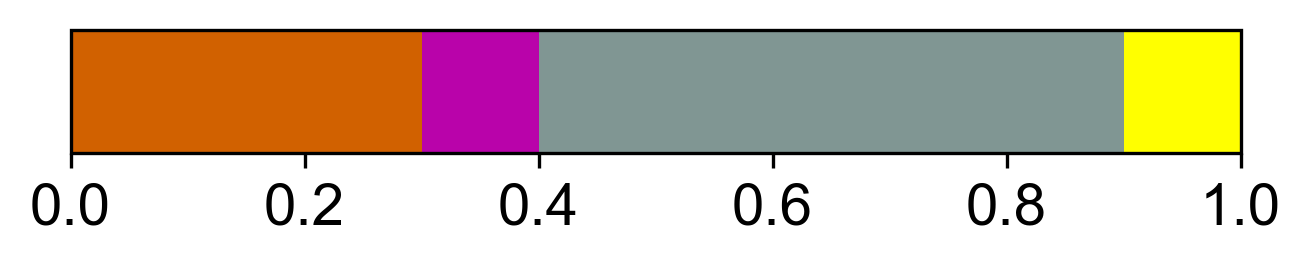

In [216]:
# results of the classification, from the alternative models Figure in Supp 3
to_plot = ['P:EPI','P:EPI','P:EPI','P:DE','16','16','16','16','16','0']
to_plot_colors = []
for entry in to_plot:
    to_plot_colors.append(adata_roadmap.uns['curated_annotation_colors'][list(adata_roadmap.obs['curated_annotation'].cat.categories).index(entry)])
fig, ax = plt.subplots(figsize=(5, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.colors.ListedColormap(to_plot_colors)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                # norm=norm,
                                orientation='horizontal')
# cb1.set_label('Some Units')
fig.show()
plt.savefig("./figures/sample_colorbar_roadmap_clusters.pdf")

In [217]:
adata_orig.uns['leiden_colors']

array(['crimson', 'darkred', 'coral', 'gold', 'MediumAquamarine',
       'CadetBlue', 'LightBlue', 'SteelBlue', 'blue', '#AD4E92'],
      dtype=object)

In [218]:
adata_orig.obs['leiden'].cat.categories

Index(['ESC-1', 'ESC-2', 'ESC-3', 'DE-1', 'AFE-1', 'AFE-2', 'AFE-3', 'AFE-4',
       'AFE-5', 'PFE-1'],
      dtype='object')

In [222]:
adata_new_rd = sc.read("tmp.h5ad") # object containing the embedding 

In [17]:
# adata_roadmap.obs['curated_annotation'].cat.categories

In [18]:
# adata.obs['curated_annotation'].cat.categories

In [19]:
# adata_roadmap.uns['curated_annotation_colors']

In [220]:
adata_new_rd.uns['curated_annotation_colors'] = adata_roadmap.uns['curated_annotation_colors']

In [225]:
adata.uns['leiden_colors']

array(['crimson', 'darkred', 'coral', 'gold', 'MediumAquamarine',
       'CadetBlue', 'LightBlue', 'SteelBlue', 'blue', '#AD4E92'],
      dtype=object)

a:ESC1
b:ESC2
c:ESC2
d:DE1
e:AFE1
f:AFE2
g:AFE3
h:AFE4
i:AFE5
j:PFE1


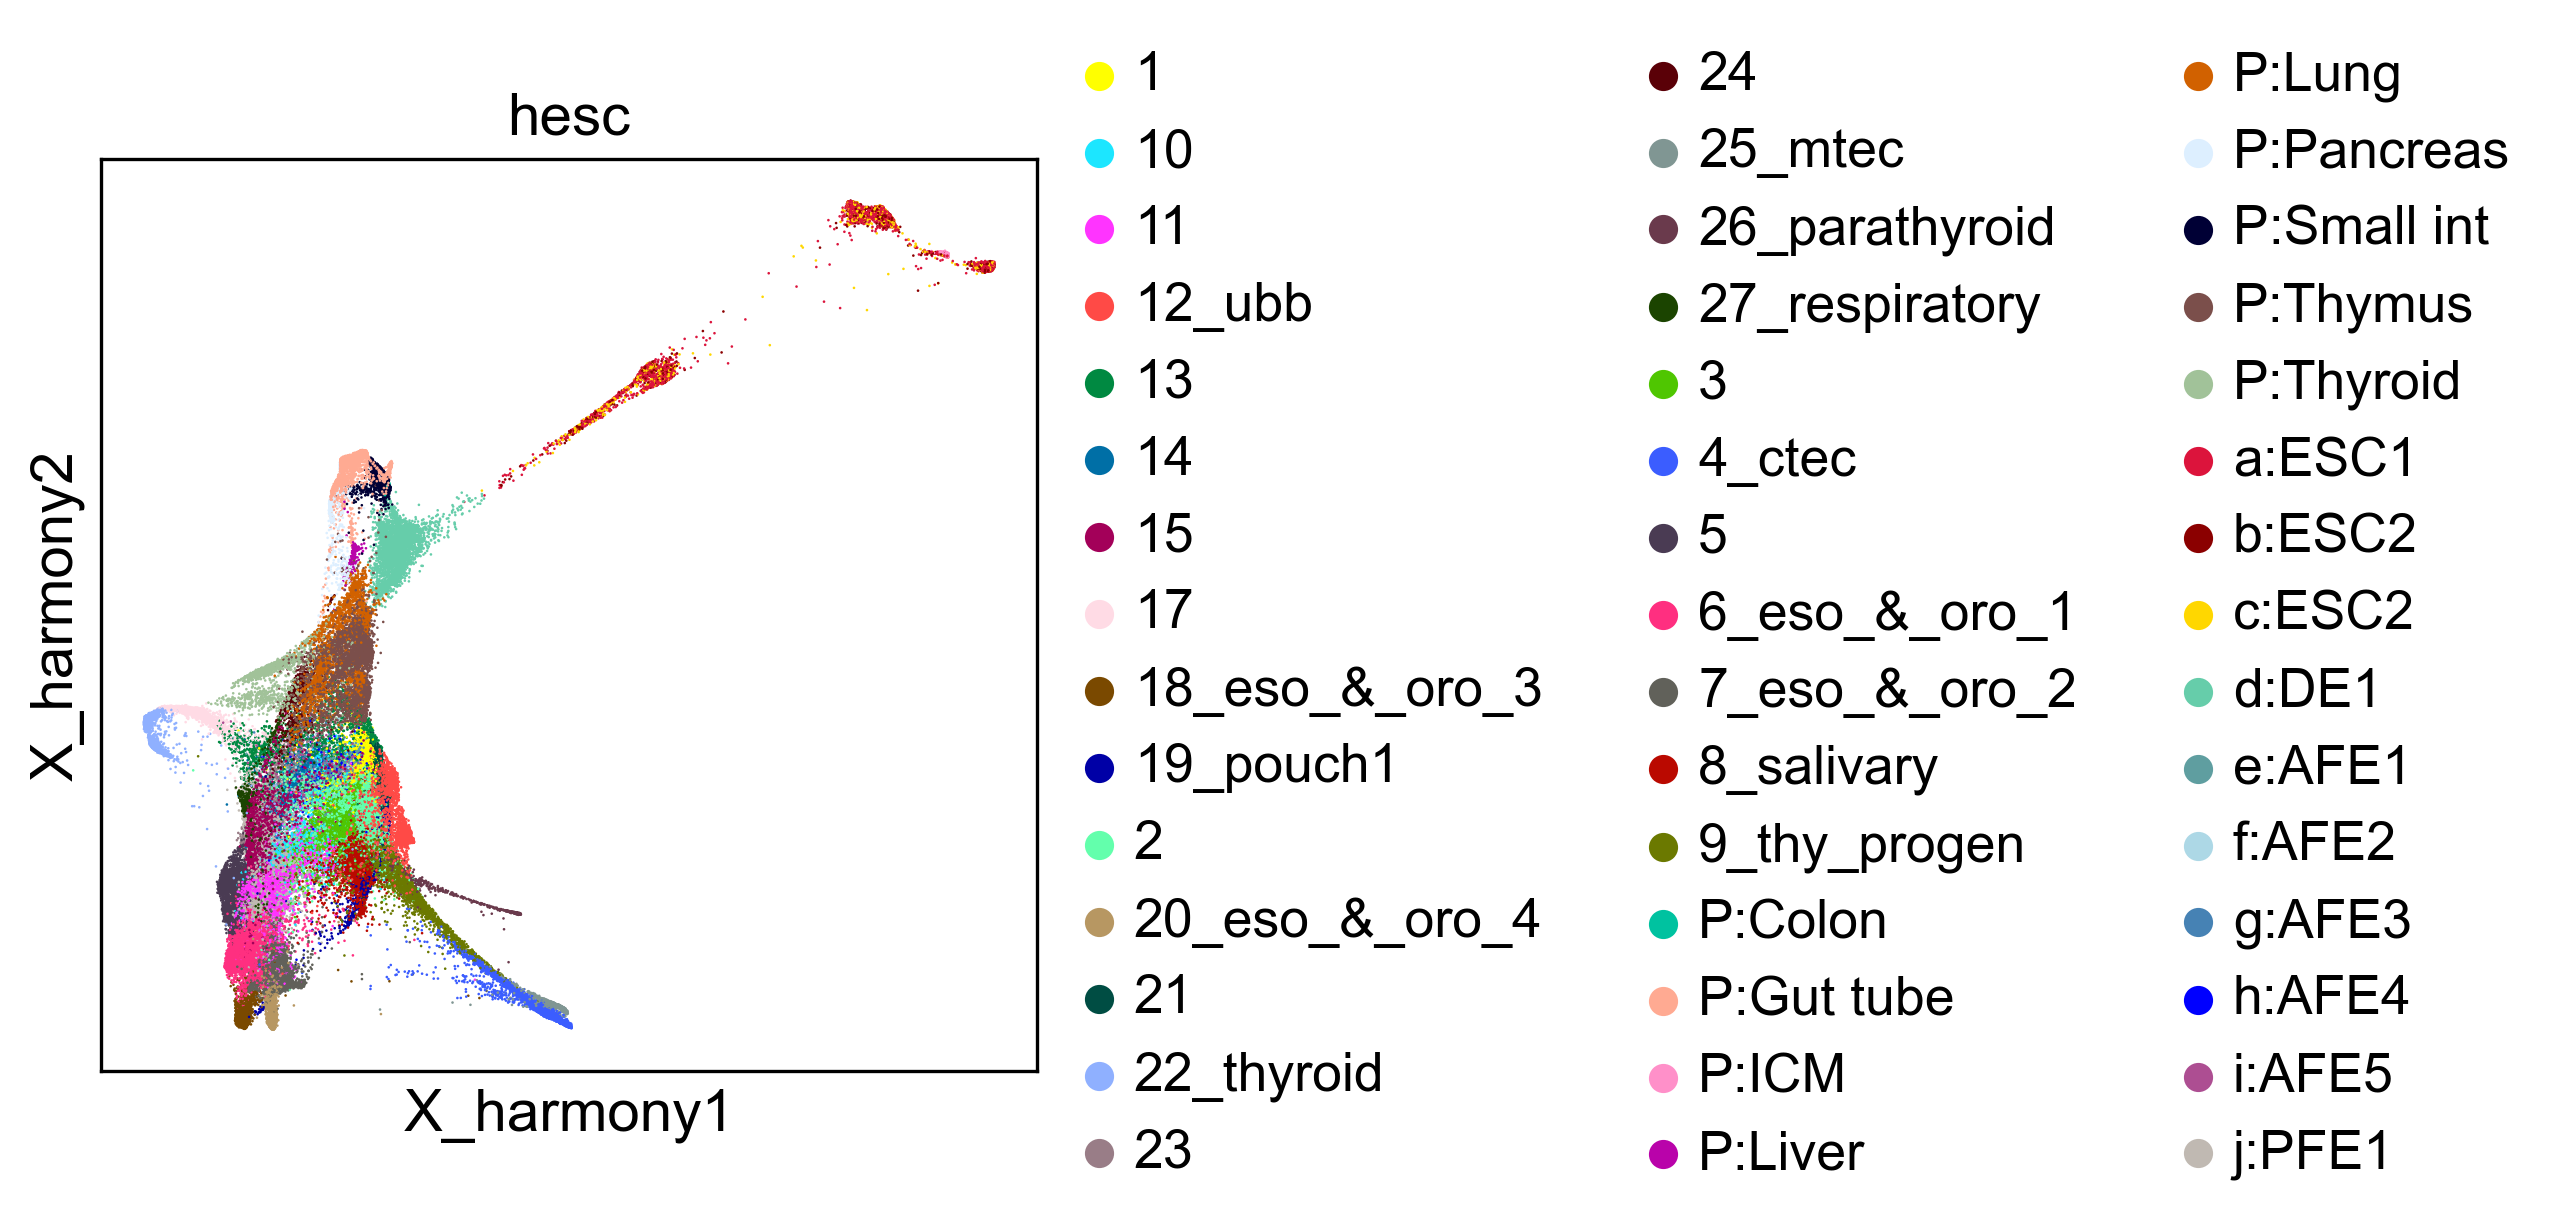

In [226]:
adata_new_rd.obs['hesc'] = adata_new_rd.obs['curated_annotation'].copy()
#adata_roadmap.uns['hesc_colors'] = adata_roadmap.uns['curated_annotation_colors'].copy()
adata_new_rd.obs['hesc'] = adata_new_rd.obs['hesc'].astype('string')
color_order = ['crimson', 'darkred', 'coral', 'gold', 'MediumAquamarine',
       'CadetBlue', 'LightBlue', 'SteelBlue', 'blue', '#AD4E92']
#cat_order = ['hESC','hDE','hAFE','hPFE1','hPFE2','monolayer split','monolayer','organoid']

cat_order = ['a:ESC1','b:ESC2','c:ESC3','d:DE1','e:AFE1','f:AFE2','g:AFE3','h:AFE4','i:AFE5','j:PFE1']
#sc.pl.umap(adata_roadmap,color='hesc')


class_to = ['P:EPI','P:EPI','P:EPI','P:DE','16','16','16','16','16','0']

cnt = 0
seen_cat = [] 
for entry in class_to:
    print(cat_order[cnt])
    if entry not in seen_cat:
        seen_cat.append(entry)
        # change the label
        adata_new_rd.obs.loc[adata_new_rd.obs['hesc']==entry,'hesc']=cat_order[cnt]
        # change the color
        #col_idx = list(adata_roadmap.obs['curated_annotation'].cat.categories).index(entry)
        #adata_roadmap.uns['hesc_colors'][col_idx] = color_order[cnt]
    else:
        tmp = sc.pp.subsample(adata_new_rd[adata_new_rd.obs['curated_annotation']==entry],fraction=0.25,copy=True,random_state=cnt)
        adata_new_rd.obs.loc[tmp.obs.index,'hesc'] = cat_order[cnt]
        # change the color
        #col_idx = list(adata_roadmap.obs['curated_annotation'].cat.categories).index(entry)
        #adata_roadmap.uns['hesc_colors'][col_idx] = color_order[cnt]
    cnt = cnt + 1
adata_new_rd.obs['hesc'] = adata_new_rd.obs['hesc'].astype('category') 

sc.pl.embedding(adata_new_rd,basis='X_harmony',color='hesc')
# now set colors
cnt = 0
for entry in cat_order:
    col_idx = list(adata_new_rd.obs['hesc'].cat.categories).index(entry)
    adata_new_rd.uns['hesc_colors'][col_idx] = color_order[cnt]
    cnt = cnt + 1

In [20]:
# adata_new_rd.uns['hesc_colors']

- 9.5 = early 
- 10.5 = mid
- 11.5 = late

In [27]:

new_name = []
tp_clus = {}

for entry in adata.obs['curated_annotation'].cat.categories:
    
    max_tp = adata[adata.obs['curated_annotation']==entry].obs['all_day'].value_counts().idxmax()
    if ':' in entry or '_' in entry:
        # print(entry,max_tp)
        new_name.append(entry)
    else:
        if max_tp == 'E9.5':
            max_tp = 'Early'
        elif max_tp == 'E10.5':
            max_tp = 'Mid'
        elif max_tp == 'E11.5':
            max_tp = 'Late'
        else:
            print(entry,"ERROR")
        new_name.append(max_tp + '_C' + entry)
    
    
    # to top and second are not same # counts 
    
    # cnts = list(adata[adata.obs['curated_annotation']==entry].obs['all_day'].value_counts())
    
    
    
    # cnts.sort()
    # print(cnts,cnts[-1]==cnts[-2])
    #if len(cnts) > 1:
    #    if cnts[-1]==cnts[-2]:
    #    
    #        print("HELP")
    # break

In [28]:
new_name

['Late_C0',
 'Early_C1',
 'Mid_C2',
 'Mid_C3',
 '4_ctec',
 'Late_C5',
 '6_eso_&_oro_1',
 '7_eso_&_oro_2',
 '8_salivary',
 '9_thy_progen',
 'Mid_C10',
 'Late_C11',
 '12_ubb',
 'Early_C13',
 'Early_C14',
 'Late_C15',
 'Early_C16',
 'Early_C17',
 '18_eso_&_oro_3',
 '19_pouch1',
 '20_eso_&_oro_4',
 'Early_C21',
 '22_thyroid',
 'Early_C23',
 'Early_C24',
 '25_mtec',
 '26_parathyroid',
 '27_respiratory',
 'P:Colon',
 'P:DE',
 'P:EPI',
 'P:Gut tube',
 'P:ICM',
 'P:Liver',
 'P:Lung',
 'P:Pancreas',
 'P:Small int',
 'P:Thymus',
 'P:Thyroid']

In [7]:
adata.rename_categories('curated_annotation',['Late_C0',
 'Early_C1',
 'Mid_C2',
 'Mid_C3',
 'Ctec_C4',
 'Late_C5',
 'Eso&Oro_C6',
 'Eso&Oro_C7',
 'Pouch2_C8',
 'ThyProgen_C9',
 'Mid_C10',
 'Late_C11',
 'Ubb_C12',
 'Early_C13',
 'Early_C14',
 'Late_C15',
 'Early_C16',
 'Early_C17',
 'Eso&Oro_C18',
 'Pouch1_C19',
 'Eso&Oro_C20',
 'Early_C21',
 'Thyroid_C22',
 'Early_C23',
 'Early_C24',
 'Mtec_C25',
 'Parathyroid_C26',
 'Respiratory_C27',
 'P:Colon',
 'P:DE',
 'P:EPI',
 'P:Gut tube',
 'P:ICM',
 'P:Liver',
 'P:Lung',
 'P:Pancreas',
 'P:Small int',
 'P:Thymus',
 'P:Thyroid'])

In [18]:
adata.obs['curated_annotation'].cat.categories

Index(['Late_C0', 'Early_C1', 'Mid_C2', 'Mid_C3', 'Ctec_C4', 'Late_C5',
       'Eso&Oro_C6', 'Eso&Oro_C7', 'Pouch2_C8', 'ThyProgen_C9', 'Mid_C10',
       'Late_C11', 'Ubb_C12', 'Early_C13', 'Early_C14', 'Late_C15',
       'Early_C16', 'Early_C17', 'Eso&Oro_C18', 'Pouch1_C19', 'Eso&Oro_C20',
       'Early_C21', 'Thyroid_C22', 'Early_C23', 'Early_C24', 'Mtec_C25',
       'Parathyroid_C26', 'Respiratory_C27', 'P:Colon', 'P:DE', 'P:EPI',
       'P:Gut tube', 'P:ICM', 'P:Liver', 'P:Lung', 'P:Pancreas', 'P:Small int',
       'P:Thymus', 'P:Thyroid'],
      dtype='object')

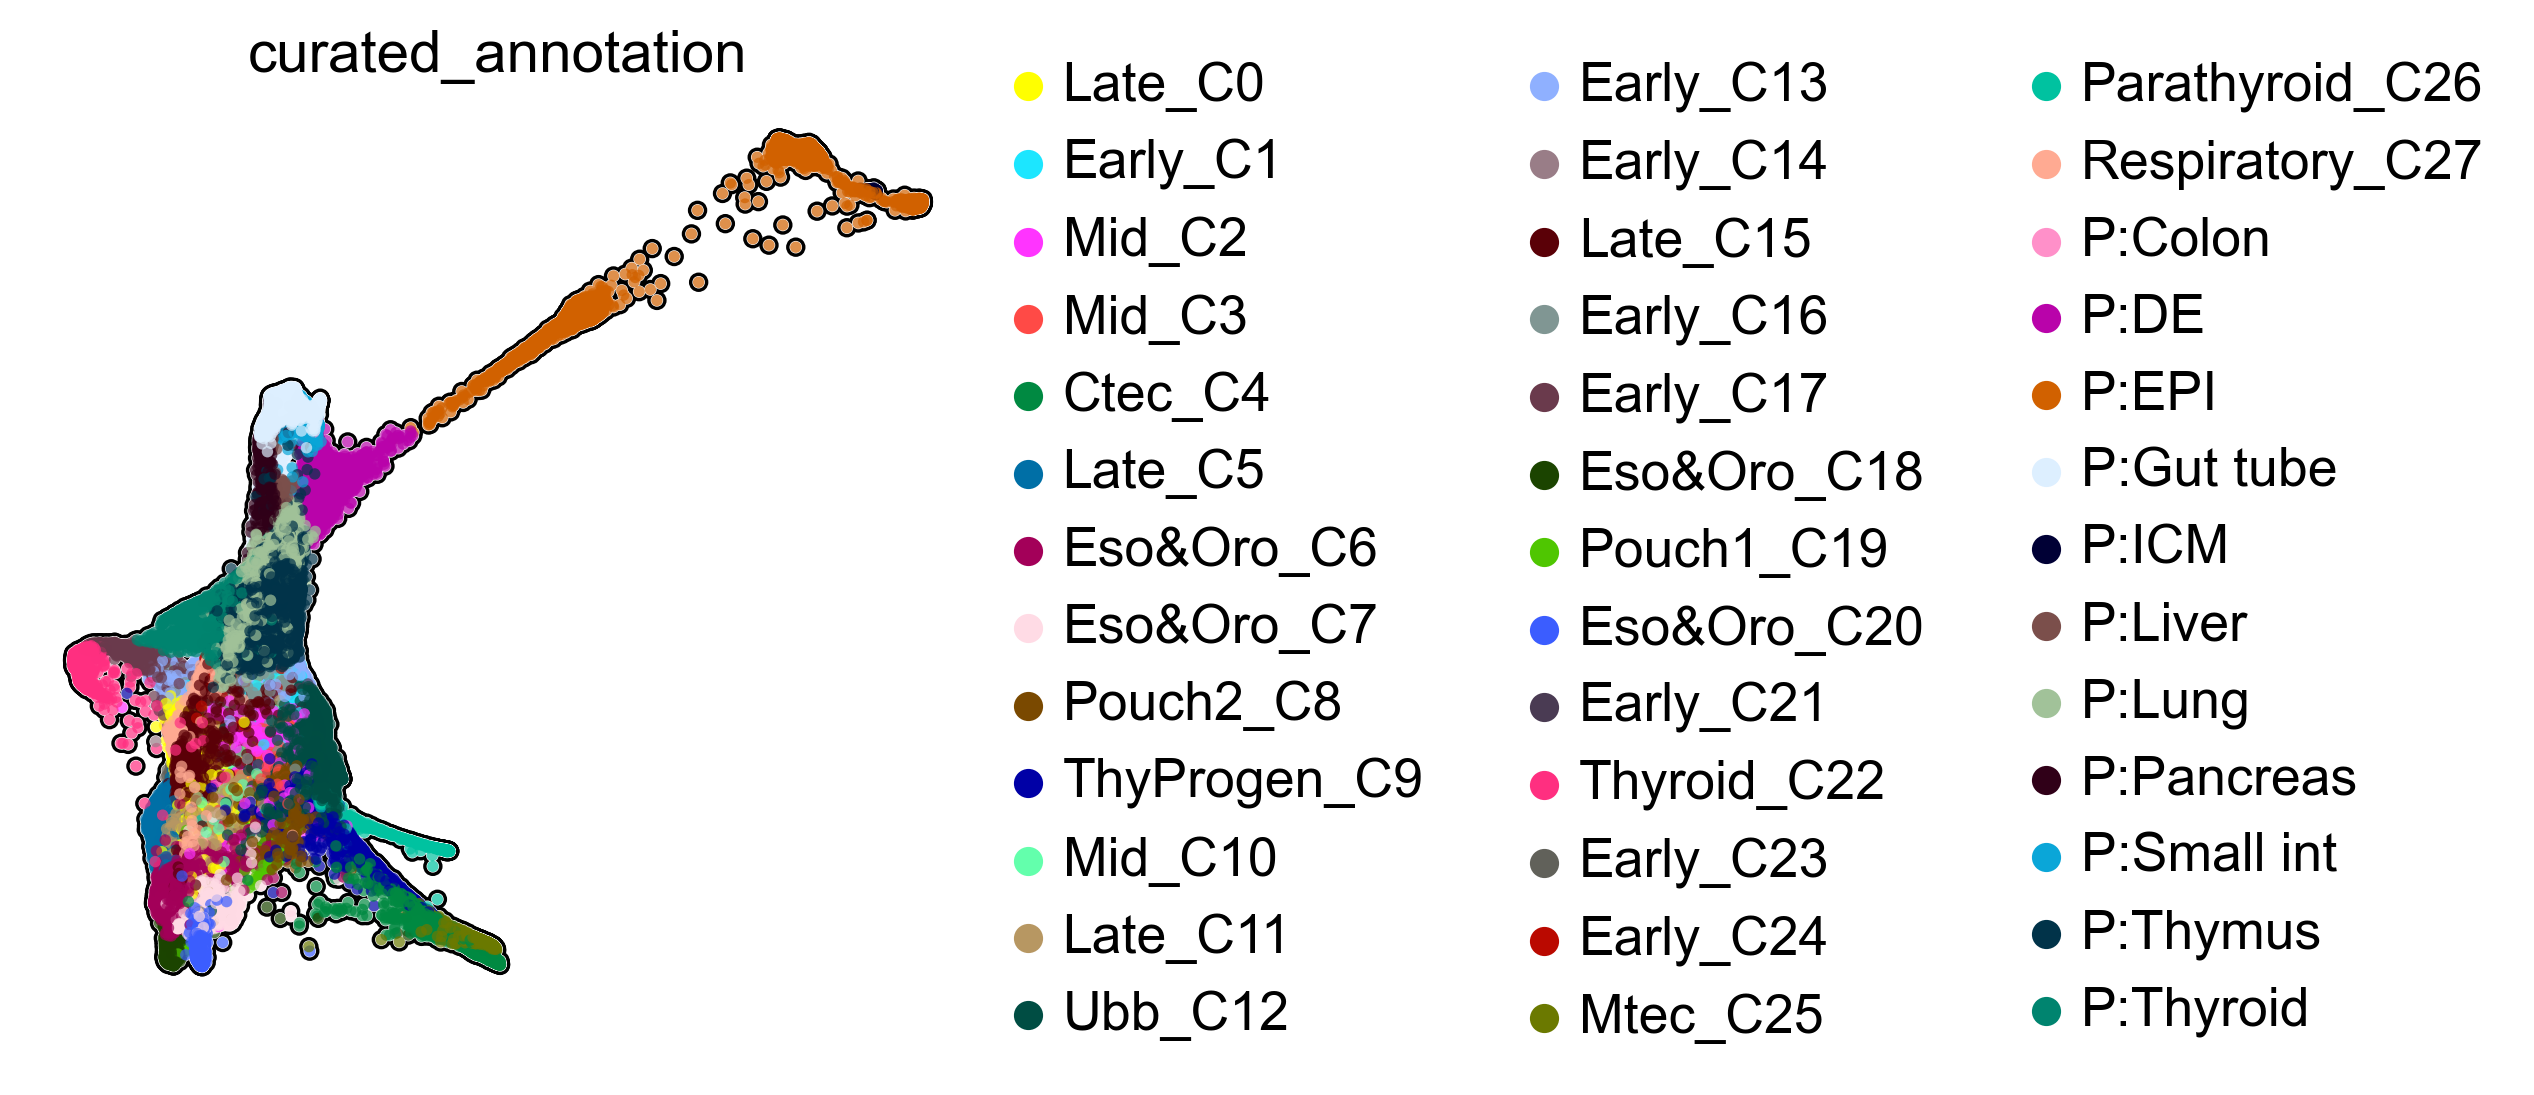

In [8]:
sc.pl.embedding(adata,basis='X_harmony',color='curated_annotation',add_outline=True,frameon=False,size=30,
                # legend_loc=None,
                save='_roadmap_anno_with_legend.pdf')
               

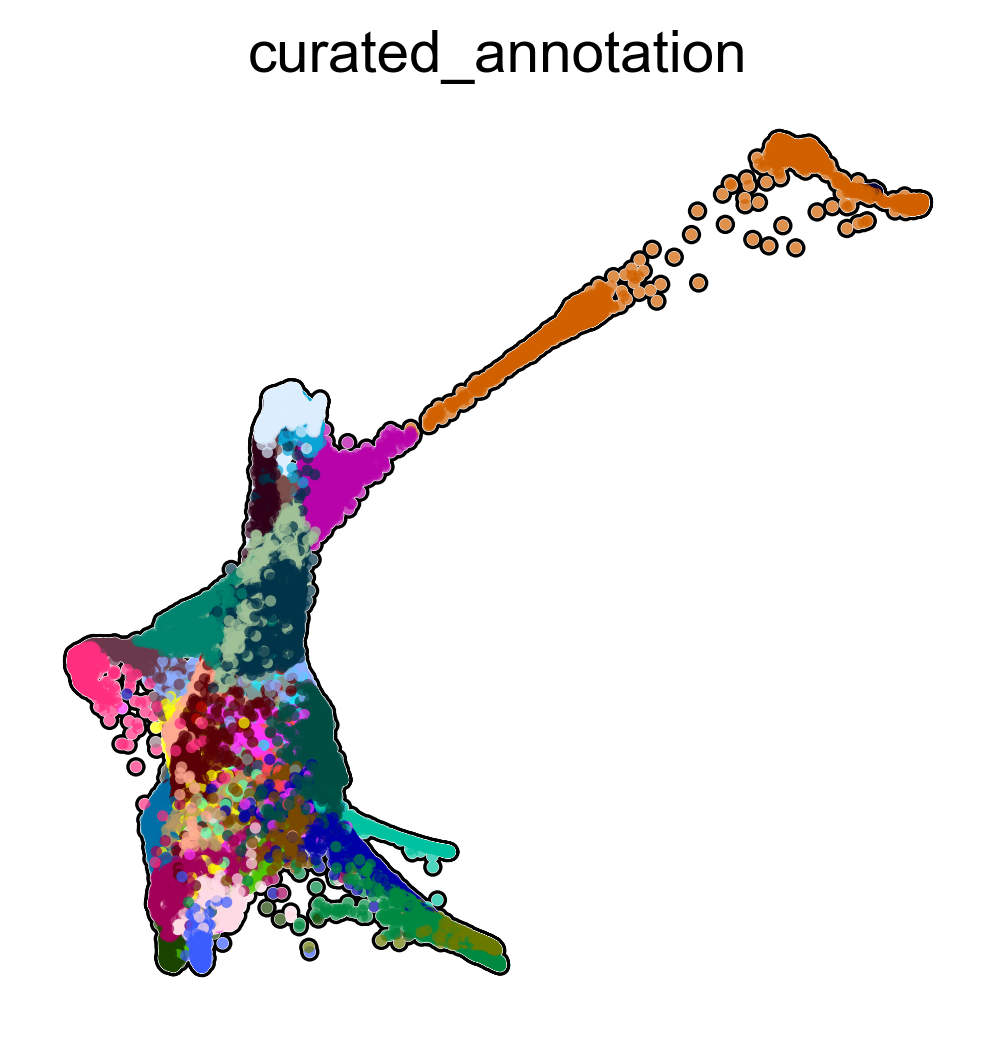

In [39]:
sc.pl.embedding(adata,basis='X_harmony',color='curated_annotation',add_outline=True,frameon=False,size=30,
                legend_loc=None,
                save='_roadmap_anno_no_legend.pdf')

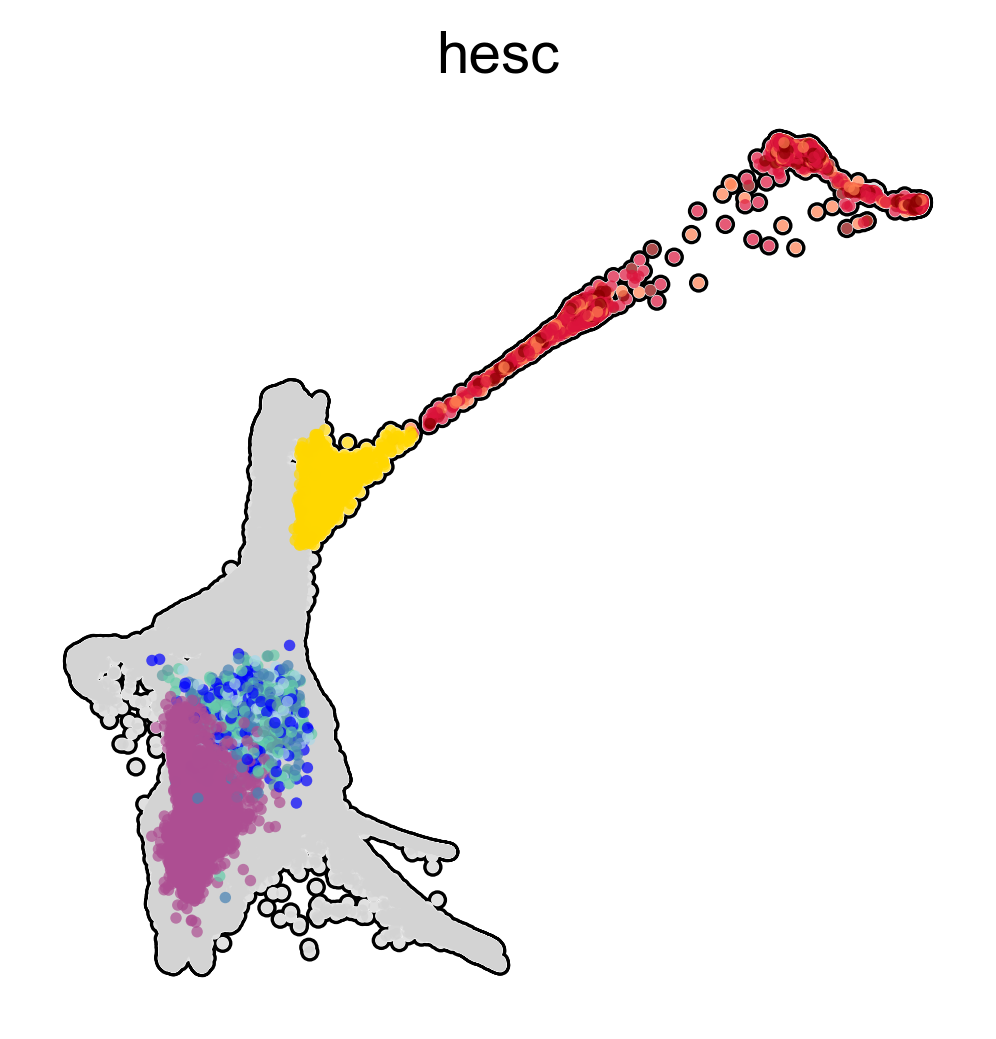

In [230]:
sc.pl.embedding(adata_new_rd,basis='X_harmony',color='hesc',groups=cat_order,add_outline=True,frameon=False,size=30,
                legend_loc=None,title=None,
                save='_classifier_esc_on_roadmap_no_legend.pdf')

In [231]:
color_order

['crimson',
 'darkred',
 'coral',
 'gold',
 'MediumAquamarine',
 'CadetBlue',
 'LightBlue',
 'SteelBlue',
 'blue',
 '#AD4E92']

<ipython-input-232-a3ccf9cebab4>:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
<ipython-input-232-a3ccf9cebab4>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


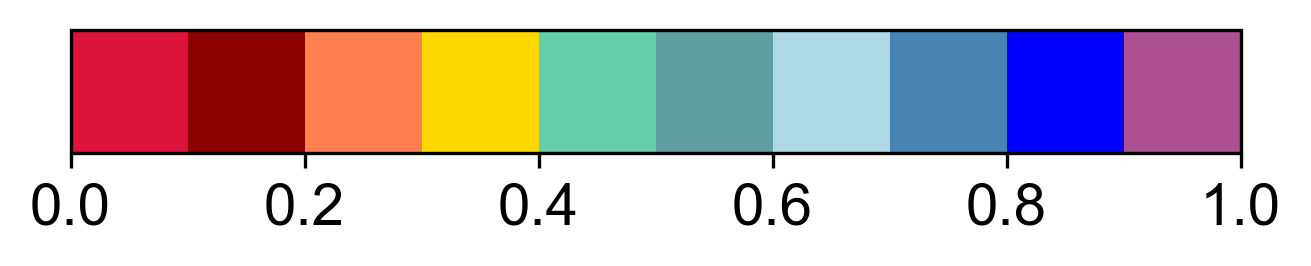

In [232]:
fig, ax = plt.subplots(figsize=(5, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.colors.ListedColormap(adata.uns['leiden_colors'])
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                # norm=norm,
                                orientation='horizontal')
# cb1.set_label('Some Units')
fig.show()
plt.savefig("./figures/sample_colorbar_esc_clusters.pdf")